In [99]:
import csv

graph = {}
with open('world.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        if len(rows[0]):
            data={}
            for i in range(6):
                k=int(rows[i+1])
                if k>0:
                    data[i]=k
            graph[int(rows[0])]=data

In [100]:
graph

{0: {0: 7649, 1: 3155, 2: 2086, 3: 6740, 4: 7296, 5: 212},
 1: {0: 14470, 1: 8886, 2: 7979, 3: 7988, 4: 12968, 5: 14184},
 2: {0: 8076, 1: 9525, 2: 9117, 3: 3410, 4: 8501, 5: 5287},
 3: {0: 3084, 1: 1913, 2: 2595, 3: 965, 4: 2096, 5: 7332},
 4: {0: 12128, 1: 12662, 2: 3263, 3: 6397, 4: 4997, 5: 10033},
 5: {0: 8781, 1: 9395, 2: 4852, 3: 7843, 4: 143, 5: 2371},
 6: {0: 5130, 1: 9512, 2: 12953, 3: 11927, 4: 8959, 5: 14364},
 7: {0: 5328, 1: 5505, 2: 3789, 3: 5221, 4: 3744, 5: 6305},
 8: {0: 5561, 1: 477, 2: 5508, 3: 3608, 4: 536, 5: 3927},
 9: {0: 1700, 1: 769, 2: 7753, 3: 7336, 4: 5765, 5: 3479},
 10: {0: 6981, 1: 4513, 2: 3650, 3: 7738, 4: 1182, 5: 5858},
 11: {0: 2473, 1: 766, 2: 9830, 3: 7293, 4: 3588, 5: 5474},
 12: {0: 8077, 1: 3268, 2: 2408, 3: 820, 4: 5767, 5: 8599},
 13: {0: 6090, 1: 289, 2: 260, 3: 7415, 4: 7200, 5: 2613},
 14: {0: 8424, 1: 4907, 2: 4332, 3: 708, 4: 8925, 5: 9735},
 15: {0: 1316, 1: 2088, 2: 8416, 3: 3647, 4: 6206, 5: 1971},
 16: {0: 18492, 1: 18685, 2: 3706, 3

In [106]:
x,y=[[]],[[]]
visited={}
pos_shift={
    0: (0, -1),
    1: (3**0.5/2, -0.5),
    2: (3**0.5/2, 0.5),
    3: (0, 1),
    4: (-3**0.5/2, 0.5),
    5: (-3**0.5/2, -0.5)
}
n=0

toVisit = []

def parcours(k,posx,posy):
    if k in visited:
        return
    visited[k]=True
    x[-1].append(posx)
    y[-1].append(posy)
    for i in graph[k]:
        shiftx, shifty=pos_shift[i]
        if graph[k][i] not in visited:
            toVisit.append((graph[k][i], posx+shiftx, posy+shifty))

In [107]:
for i in graph:
    if i not in visited:
        x.append([])
        y.append([])
        toVisit.append((i,0,0))
        while len(toVisit):
            a,b,c=toVisit.pop(0)
            parcours(a,b,c)

In [108]:
len(x)

126

In [109]:
n=0
for a in x:
    if len(a)>1000:
        n+=1
n

3

In [110]:
import matplotlib.pyplot as plt

for i in range(len(x)):
    if len(x[i])>1000:
      print(i)

1
34
35


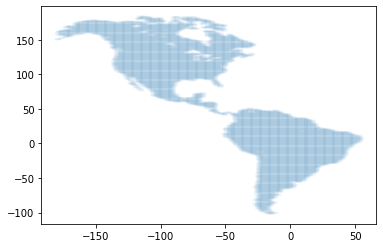

In [111]:
plt.scatter(x[1],y[1], alpha=0.5, linewidths=0.1, marker="_")

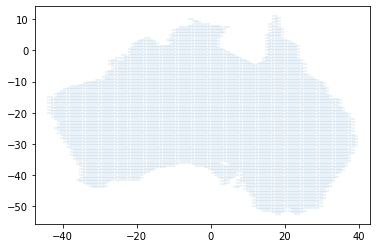

In [112]:
plt.scatter(x[34],y[34], alpha=0.9, linewidths=0.2, marker="_")

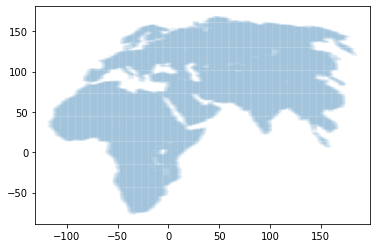

In [113]:
plt.scatter(x[35],y[35], alpha=0.5, linewidths=0.1, marker="_")

Modele : 
chaque hexagone a un nb d'habitant et un mode de vie : sedentaire/chasseur cueilleur

chasseur-cueilleur : plus faible densite max toleree, resiste mal aux saisons, faible migration longitudinale
sedentaire : plus forte densite max toleree, besoin de fortes saisons, moins de nourriture en moyenne
